In [1]:
import csv
import numpy as np
import pandas as pd

只看members_v3.csv和train.csv分析

In [2]:
members_v3 = pd.read_csv("D:/kkbox-churn-prediction-challenge/members_v3.csv")
members_v3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769473 entries, 0 to 6769472
Data columns (total 6 columns):
msno                      object
city                      int64
bd                        int64
gender                    object
registered_via            int64
registration_init_time    int64
dtypes: int64(4), object(2)
memory usage: 309.9+ MB


In [3]:
members_v3.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


In [4]:
train = pd.read_csv("D:/kkbox-churn-prediction-challenge/train.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992931 entries, 0 to 992930
Data columns (total 2 columns):
msno        992931 non-null object
is_churn    992931 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.2+ MB


In [5]:
train.head()

,msno,is_churn
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1


In [6]:
train["is_churn"].sum()/train["is_churn"].shape

array([0.06392287])

In [7]:
mmt=pd.merge(members_v3,train)

In [108]:
mmt["registered_via"].unique()

array([ 7,  9,  3,  4, 13], dtype=int64)

去除空直和不合理數值

In [91]:
mmt2=mmt[((mmt["gender"]=="female")|(mmt["gender"]=="male"))&((mmt["bd"]>0)&(mmt["bd"]<100))].dropna() 
mmt3=pd.concat( [mmt2.loc[mmt2.is_churn==1].sample(30000), mmt2.loc[mmt2.is_churn==0].sample(30000)], axis=0)

對城市性別註冊裝置年齡有興趣

In [93]:
dummy_city = pd.get_dummies(mmt3['city'], prefix='city')
dummy_gender = pd.get_dummies(mmt3['gender'], prefix='gender')
dummy_registered_via = pd.get_dummies(mmt3['registered_via'], prefix='registered_via')

In [104]:
train=pd.concat( [dummy_city.iloc[:,1:], dummy_gender.iloc[:,1:],dummy_registered_via.iloc[:,1:],mmt3["bd"]], axis=1)
train['intercept'] = 1.0

羅吉斯回歸模型

In [106]:
import statsmodels.api as sm
import pylab as pl
logit = sm.Logit(mmt3['is_churn'],train)
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.658445
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               is_churn   No. Observations:                60000
Model:                          Logit   Df Residuals:                    59973
Method:                           MLE   Df Model:                           26
Date:                Thu, 28 Mar 2019   Pseudo R-squ.:                 0.05006
Time:                        23:26:01   Log-Likelihood:                -39507.
converged:                       True   LL-Null:                       -41589.
                                        LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
city_3               -0.5660      0.091     -6.228      0.000      -0.744      -0.388
city_4               -0.5089      0.053     -9.568      0.000      -0.613      -0.405
city_5               -0.4238      0.051     -8.250      0.000      -0.524      -0.323
city_6               -0.5969      0.058    -10.284      0.000      -0.711      -0.483
city_7               -0.8657      0.122     -7.106      0.000      -1.104      -0.627
city_8               -0.4098      0.077     -5.321      0.000      -0.561      -0.259
city_9               -0.4841      0.075     -6.487      0.000      -0.630      -0.338
city_10              -0.4190      0.083     -5.061      0.000      -0.581      -0.257
city_11              -0.6438      0.076     -8.504      0.000      -0.792      -0.495
city_12              -0.4281      0.068     -6.258      0.000      -0.562      -0.294
city_13              -0.5486      0.051    -10.834      0.000      -0.648      -0.449
city_14              -0.5581      0.062     -9.032      0.000      -0.679      -0.437
city_15              -0.5762      0.054    -10.667      0.000      -0.682      -0.470
city_16              -0.4694      0.188     -2.502      0.012      -0.837      -0.102
city_17              -0.7108      0.090     -7.889      0.000      -0.887      -0.534
city_18              -0.5467      0.079     -6.879      0.000      -0.702      -0.391
city_19              -0.5423      0.524     -1.036      0.300      -1.569       0.484
city_20              -0.6351      0.220     -2.890      0.004      -1.066      -0.204
city_21              -0.3586      0.087     -4.100      0.000      -0.530      -0.187
city_22              -0.5514      0.054    -10.159      0.000      -0.658      -0.445
gender_male          -0.0208      0.017     -1.226      0.220      -0.054       0.012
registered_via_4      0.3583      0.033     10.823      0.000       0.293       0.423
registered_via_7     -1.1826      0.029    -40.870      0.000      -1.239      -1.126
registered_via_9     -0.4417      0.021    -21.374      0.000      -0.482      -0.401
registered_via_13    -1.0312      0.306     -3.365      0.001      -1.632      -0.431
bd                   -0.0264      0.001    -26.176      0.000      -0.028      -0.024
intercept             1.6289      0.056     29.180      0.000       1.519       1.738
=====================================================================================
"""

z職越大代表越有差 city1 於其他城市有差(更容易流失) 而其中city_6,13,15,22 代表相對city1 是不容易流失 裝置registered_via_7,9相對registered_via_3不容易流失  registered_via_4相對registered_via_3容易流失 隨年齡上升變得不容易流失 男女性無顯著差異



In [110]:
test=pd.concat([mmt2["city"],mmt2["gender"],mmt2["registered_via"],mmt2["bd"],mmt2["is_churn"]], axis=1).sample(10000)
test['intercept'] = 1.0

In [116]:
dummy_city_test = pd.get_dummies(test['city'], prefix='city')
dummy_gender_test = pd.get_dummies(test['gender'], prefix='gender')
dummy_registered_via_test = pd.get_dummies(test['registered_via'], prefix='registered_via')
test['predict'] =result.predict(
    pd.concat( 
        [dummy_city_test.iloc[:,1:], dummy_gender_test.iloc[:,1:],
         dummy_registered_via_test.iloc[:,1:],
         test["bd"],
         test['intercept']], axis=1))


In [128]:
total = 0
hit = 0
for value in test.values:
    total +=1
    if (value[4] == 1)&(value[-1]>0.8):
        hit +=1
    if (value[4] == 0)&(value[-1]<0.8):
        hit +=1

hit/total

0.9132

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

年齡分布

(array([6.70000e+01, 3.70000e+01, 5.30000e+01, 1.08000e+02, 1.22000e+02,
        1.70000e+02, 1.48000e+02, 1.13000e+02, 8.10000e+01, 9.70000e+01,
        1.06000e+02, 1.99000e+02, 7.90000e+02, 5.63200e+03, 1.66450e+04,
        4.27780e+04, 8.21110e+04, 9.06590e+04, 9.13740e+04, 1.10452e+05,
        1.10574e+05, 1.12200e+05, 1.01500e+05, 9.72520e+04, 9.15140e+04,
        9.24330e+04, 1.02769e+05, 8.27220e+04, 8.20260e+04, 7.04430e+04,
        6.26120e+04, 6.46070e+04, 5.85590e+04, 5.56670e+04, 5.31950e+04,
        5.14150e+04, 5.43810e+04, 4.27950e+04, 3.88390e+04, 3.54200e+04,
        3.39680e+04, 2.83540e+04, 2.52850e+04, 2.29980e+04, 2.14010e+04,
        2.06700e+04, 2.22090e+04, 1.70910e+04, 1.56970e+04, 1.37850e+04,
        1.31340e+04, 1.14570e+04, 9.49400e+03, 8.39200e+03, 7.25900e+03,
        6.34400e+03, 5.90100e+03, 4.58100e+03, 4.12100e+03, 3.44100e+03,
        3.23600e+03, 3.06600e+03, 2.29100e+03, 1.86100e+03, 1.81100e+03,
        1.62800e+03, 1.71300e+03, 1.02200e+03, 8.13

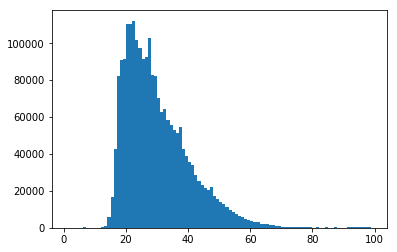

In [24]:
mebd=members_v3["bd"][((members_v3["bd"]>0)&(members_v3["bd"]<100))]
plt.hist(mebd,bins=98)

居住分布

(array([4.804326e+06, 0.000000e+00, 2.728200e+04, 2.468480e+05,
        3.850690e+05, 1.352000e+05, 1.161000e+04, 4.597500e+04,
        4.763900e+04, 3.248200e+04, 4.748900e+04, 6.684300e+04,
        3.209780e+05, 8.994000e+04, 1.902130e+05, 5.092000e+03,
        2.777200e+04, 3.803900e+04, 1.199000e+03, 4.233000e+03,
        2.412440e+05]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22.]),
 <a list of 21 Patch objects>)

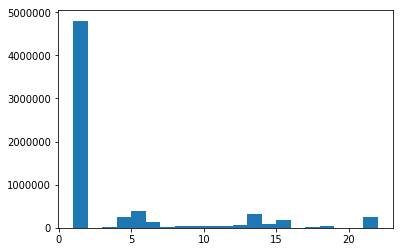

In [23]:
mect=members_v3["city"]
plt.hist(mect,bins=21)

In [ ]:
註冊裝置分布

([<matplotlib.axis.XTick at 0x14763df0>,
 <a list of 19 Text xticklabel objects>)

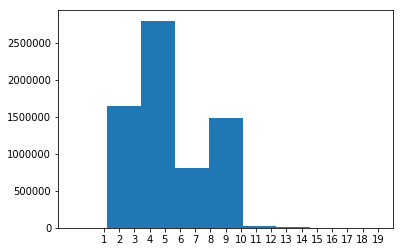

In [30]:
plt.hist(members_v3["registered_via"],bins=9)
plt.xticks(np.arange(1,20,1.0))